In [1]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from itertools import chain, combinations
import statsmodels.api as sm

pd.set_option('display.max_rows', 12)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:20,.2f}'.format)

plt.style.use('seaborn-v0_8')

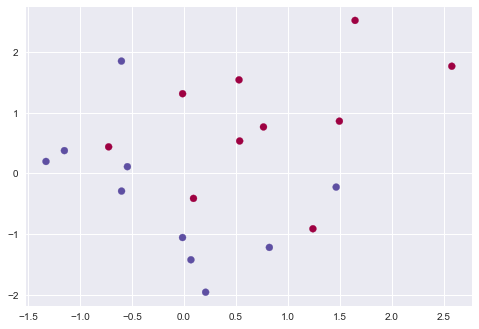

In [3]:
np.random.seed(42)

X = np.random.normal(size=40).reshape(20, 2)
y = np.concatenate((np.ones(10, dtype=np.int64), np.zeros(10, dtype=np.int64)))
X[y == 1, :] += 1

plt.scatter(X[:, 0], X[:, 1], c=(3-y), cmap='Spectral')

# SVC

In [4]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=1e6)
svc.fit(X, y)

SVC(C=1000000.0, kernel='linear')

<AxesSubplot: >

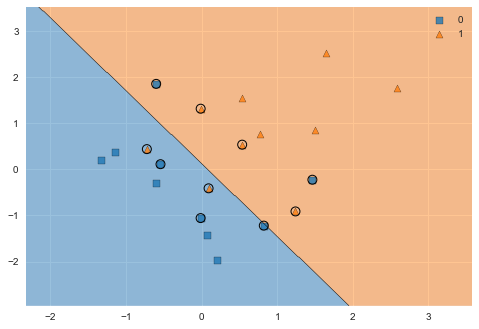

In [6]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=svc, X_highlight=svc.support_vectors_)

<AxesSubplot: >

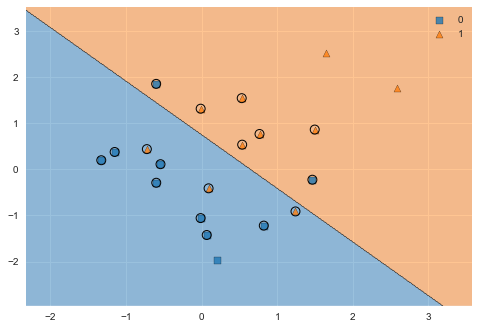

In [7]:
svc2 = SVC(kernel='linear', C=0.1)
svc2.fit(X, y)

plot_decision_regions(X, y, clf=svc2, X_highlight=svc2.support_vectors_)

In [8]:
pd.DataFrame(svc2.support_vectors_, index=svc2.support_)

,0,1
10,1.47,-0.23
11,0.07,-1.42
12,-0.54,0.11
13,-1.15,0.38
14,-0.60,-0.29
...,...,...
5,0.54,0.53
6,1.24,-0.91
7,-0.72,0.44
8,-0.01,1.31


In [9]:
from sklearn.model_selection import GridSearchCV

svc3 = SVC(kernel='linear')
c_space = np.array([0.001, 0.01, 0.1, 1, 5, 10, 100])
param_grid = {'C': c_space}

tune = GridSearchCV(svc3, param_grid, cv=10)
tune.fit(X, y)

tune.cv_results_
tune.best_params_

{'C': 0.001}

In [10]:
pd.DataFrame(tune.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.00,0.00,0.00,0.00,0.00,{'C': 0.001},1.00,1.00,1.00,1.00,1.00,0.00,0.50,0.50,0.50,0.50,0.70,0.33,1
1,0.00,0.00,0.00,0.00,0.01,{'C': 0.01},1.00,1.00,1.00,1.00,1.00,0.00,0.50,0.50,0.50,0.50,0.70,0.33,1
2,0.00,0.00,0.00,0.00,0.10,{'C': 0.1},0.50,1.00,1.00,1.00,1.00,0.50,0.50,0.50,0.50,0.50,0.70,0.24,1
3,0.00,0.00,0.00,0.00,1.00,{'C': 1.0},0.50,1.00,1.00,1.00,1.00,0.50,0.50,0.00,1.00,0.50,0.70,0.33,1
4,0.00,0.00,0.00,0.00,5.00,{'C': 5.0},0.50,1.00,1.00,1.00,1.00,0.50,0.50,0.00,1.00,0.50,0.70,0.33,1
5,0.00,0.00,0.00,0.00,10.00,{'C': 10.0},0.50,1.00,1.00,1.00,1.00,0.50,0.50,0.00,1.00,0.50,0.70,0.33,1
6,0.00,0.00,0.00,0.00,100.00,{'C': 100.0},0.50,1.00,1.00,1.00,1.00,0.50,0.50,0.00,1.00,0.50,0.70,0.33,1


(<Figure size 576x396 with 1 Axes>,
 <AxesSubplot: xlabel='predicted label', ylabel='true label'>)

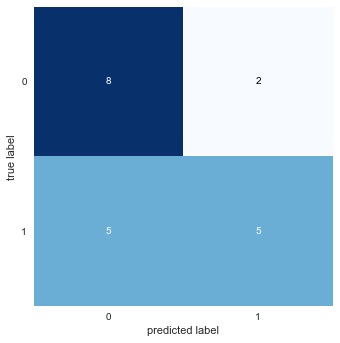

In [11]:
from sklearn.utils import resample

np.random.seed(42)
X_test = np.random.normal(size=40).reshape(20, 2)
y_test = resample(np.concatenate((np.ones(10, dtype=np.int64), np.zeros(10, dtype=np.int64))), replace=True, n_samples=20, random_state=42)
X_test[y_test == 1, :] += 1

y_pred = tune.predict(X_test)

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(confusion_matrix(y_test, y_pred))

(<Figure size 576x396 with 1 Axes>,
 <AxesSubplot: xlabel='predicted label', ylabel='true label'>)

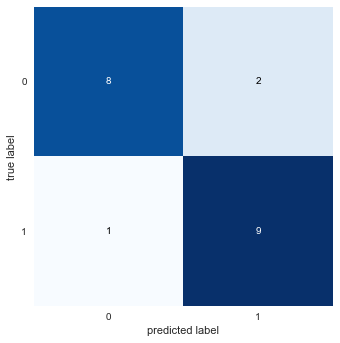

In [12]:
svc4 = SVC(kernel='linear', C=0.1)
svc4.fit(X, y)

y_pred4 = svc4.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred4))

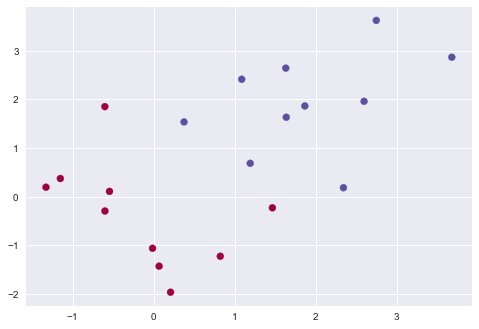

In [13]:
X[y == 1, :] += 1.1
plt.scatter(X[:, 0], X[:, 1], c=(y+5)/2, cmap='Spectral')

<AxesSubplot: >

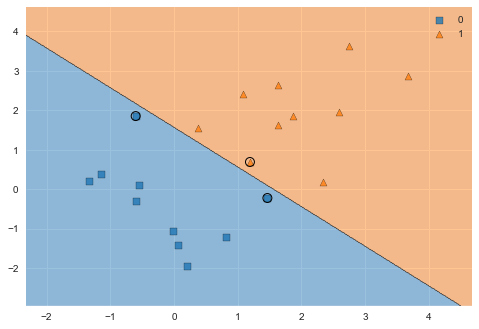

In [14]:
svc5 = SVC(kernel='linear', C=1e5)
svc5.fit(X, y)

plot_decision_regions(X, y, clf=svc5, X_highlight=svc5.support_vectors_)

<AxesSubplot: >

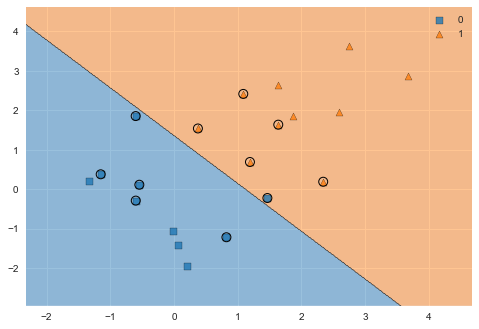

In [15]:
svc6 = SVC(kernel='linear', C=0.1)
svc6.fit(X, y)

plot_decision_regions(X, y, clf=svc6, X_highlight=svc6.support_vectors_)

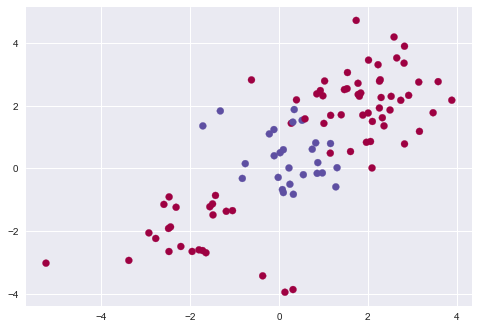

In [18]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = np.random.normal(size=400).reshape(200, 2)
X[0:100, :] += 2
X[100:150, :] -= 2
y = np.concatenate((np.full(150, 1, dtype=np.int64), np.full(50, 2, dtype=np.int64)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='Spectral')

<AxesSubplot: >

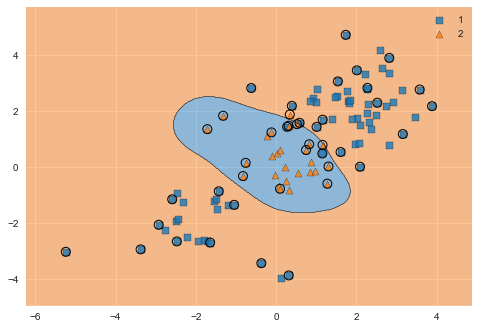

In [19]:
svm = SVC(kernel='rbf', C=1, gamma=1)
svm.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, clf=svm, X_highlight=svm.support_vectors_)

<AxesSubplot: >

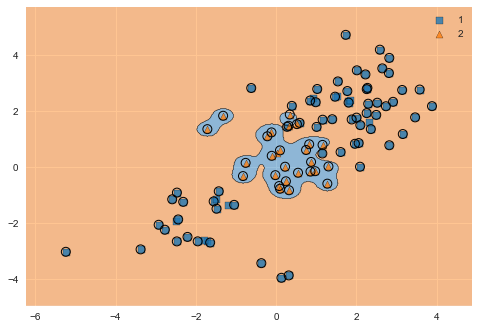

In [20]:
svm2 = SVC(kernel='rbf', C=1, gamma=10)
svm2.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, clf=svm2, X_highlight=svm2.support_vectors_)

In [22]:
svm3 = SVC(kernel='rbf')
c_space = np.array([0.1, 1, 10, 100, 1000])
g_space = np.array([0.5, 1, 2, 3, 4])
param_grid = {'C': c_space, 'gamma': g_space}

tune = GridSearchCV(svm3, param_grid, cv=10)
tune.fit(X_train, y_train)

tune.cv_results_
tune.best_params_

{'C': 1.0, 'gamma': 0.5}

<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

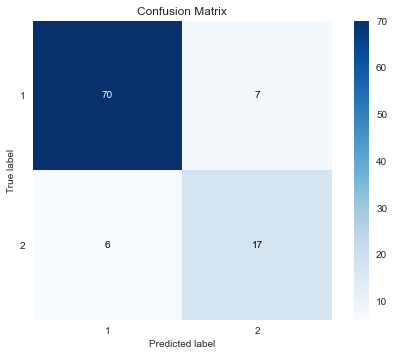

In [23]:
y_pred = tune.predict(X_test)

import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [24]:
svm4 = SVC(kernel='rbf', C=1, gamma=1, probability=True)
svm4.fit(X_train, y_train)

svm5 = SVC(kernel='rbf', C=1, gamma=50, probability=True)
svm5.fit(X_train, y_train)

y_probas4 = svm4.predict_proba(X_test)
y_probas5 = svm5.predict_proba(X_test)

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

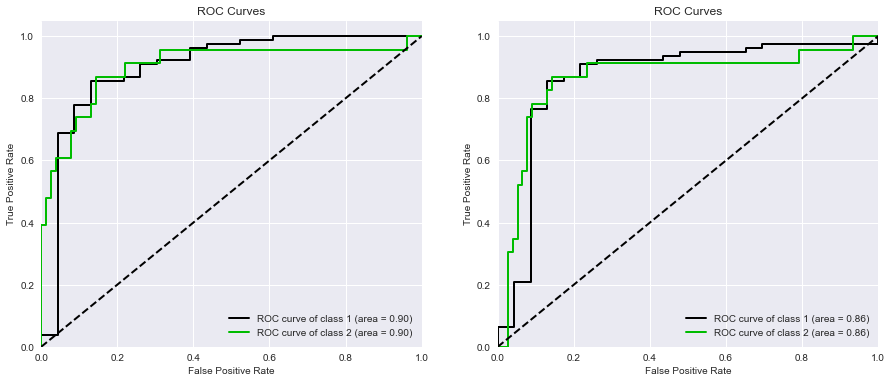

In [25]:
f, axes = plt.subplots(1, 2, sharey=False, sharex=False)
f.set_figheight(6)
f.set_figwidth(15)

skplt.metrics.plot_roc(y_test, y_probas4, ax=axes[0], plot_micro=False, plot_macro=False)
skplt.metrics.plot_roc(y_test, y_probas5, ax=axes[1], plot_micro=False, plot_macro=False)

<AxesSubplot: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

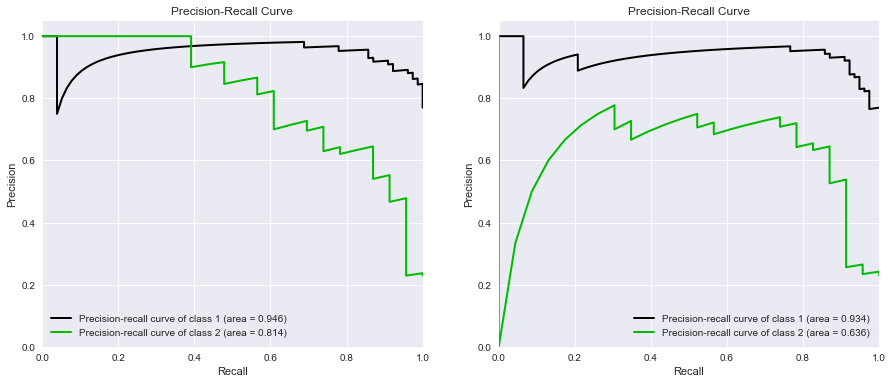

In [26]:
y_probas_test_4 = svm4.predict_proba(X_test)
y_probas_test_5 = svm5.predict_proba(X_test)

f, axes = plt.subplots(1, 2, sharey=False, sharex=False)
f.set_figheight(6)
f.set_figwidth(15)

skplt.metrics.plot_precision_recall(y_test, y_probas_test_4, ax=axes[0], plot_micro=False)
skplt.metrics.plot_precision_recall(y_test, y_probas_test_5, ax=axes[1], plot_micro=False)

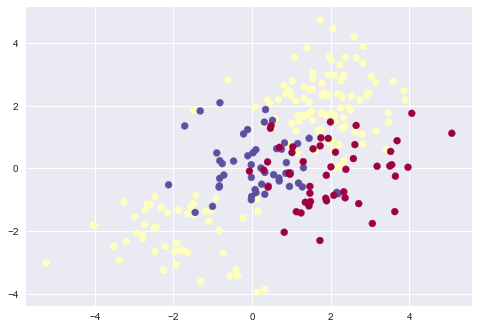

In [27]:
np.random.seed(42)

X = np.random.normal(size=400).reshape(200, 2)
X[0:100, :] += 2
X[100:150, :] -= 2
y = np.concatenate((np.full(150, 1, dtype=np.int64), np.full(50, 2, dtype=np.int64)))

X = np.concatenate((X, np.random.normal(size=100).reshape(50, 2)))
y = np.concatenate((y, np.full(50, 0, dtype=np.int64)))

X[y == 0, :1] += 2
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral')

<AxesSubplot: >

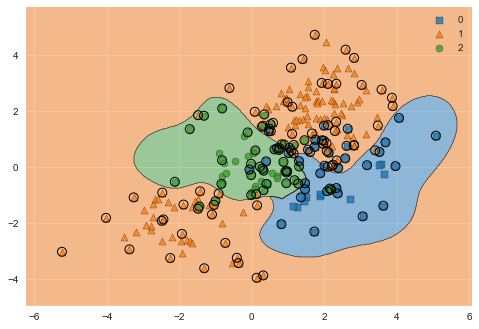

In [28]:
svm_m = SVC(kernel='rbf', C=10, gamma=1)
svm_m.fit(X, y)

plot_decision_regions(X, y, clf=svm_m, X_highlight=svm_m.support_vectors_)